In [1]:
from pychomp import *
from pychomp.Braids import *

In [2]:
braid_diagram = BraidDiagram([[1,4,3,3,1,4,3,3,1], [2,1,2,1,2,1,2,1,2],
                              [3,3,1,4,3,3,1,4,3], [4,2,4,2,4,2,4,2,4]])

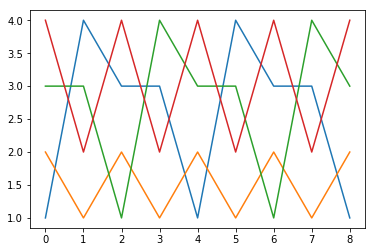

Braid Diagram

In [3]:
braid_diagram

In [4]:
%%time
braid_complex, braid_graph = BraidComplex(braid_diagram)

CPU times: user 1min 24s, sys: 2.06 s, total: 1min 26s
Wall time: 1min 27s


In [ ]:
%%time
(poset, fibration) = ConleyMorseFibration(braid_complex, braid_graph)

CPU times: user 39.8 s, sys: 933 ms, total: 40.8 s
Wall time: 41.1 s


In [ ]:
%%time
connection_matrix = ConnectionMatrix(fibration)

In [ ]:
%%time
reduced_poset = Poset(InducedSubgraph(TransitiveClosure(poset), lambda v : v in connection_matrix.count()))

In [ ]:
%%time
df = DrawFibration(connection_matrix, reduced_poset)

In [ ]:
with open('cm.gv','w') as outfile:
    outfile.write(df.graphviz())

In [ ]:
df

In [ ]:
bd = lambda cell : connection_matrix.complex().boundary(cell)
C = connection_matrix.complex()
print("Connection Matrix Data")
print("======================")
for d in range(0,C.dimension()):
    print("  Boundaries of " + str(d) + "-cells in Connection Fibration:")
    for c in C(d):
        print("    " + str( c) + ' : ' + str(bd({c})))

In [ ]:
braid_complex.size()